# Post-processing Simulation Data from the Web GUI

The Tidy3D Web GUI provides a straightforward and user-friendly interface to build simulation models and visualize results.

However, for more advanced tasks—such as custom post-processing, batch analysis, or integrating results across multiple simulations—Python offers a powerful and flexible approach. With Python, the possibilities for post-processing are virtually limitless.

Tidy3D users need not be Python experts to do this. The Tidy3D Web GUI generates pre-built Python code snippets for most simulations, and you can run them directly in our [Web Notebook](https://tidy3d.simulation.cloud/notebook) environment. No local installation required.

In this notebook, we’ll walk through tips and examples for post-processing parametric sweep results from the Web GUI using Python. Most code snippets presented here can be easily adapted to your own projects.

We will cover the following topics:

[1](#1): Load results from the GUI.  
[2](#2): Plot flux results on the same canvas.  
[3](#3): Work with field data from a [FieldMonitor](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.FieldMonitor.html) for multiple simulations.  
[4](#4): Work with data from a [ModeMonitor](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.ModeMonitor.html) for multiple simulations.  
[5](#5): Work with data from a [ModeSolver](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.plugins.mode.ModeSolver.html) sweep.

We won’t focus on the simulation setup itself. Instead, we’ll use data from our [All-dielectric Structural Colors](https://tidy3d.simulation.cloud/workbench?taskId=pa-5800ec55-54ae-44ac-861e-6ac2085ad918) example as a reference.

Let’s get started!

## Loading Results From GUI <a name="1"></a>

Once you run a parametric sweep, you will see the **Download Using Python** button. This button generates a script as shown below. 

```python
import tidy3d as td
import tidy3d.web as web
import matplotlib.pyplot as plt

# Define the simulation list
sim_list = [
    {'task_id': 'sw-5f2a3905-a835-46ea-9a5b-b33923925b454', 'variables': {'period': 0.38}},
    {'task_id': 'sw-a05473ab-f17e-4b03-a6c4-53ae3df47f211', 'variables': {'period': 0.32}},
    {'task_id': 'sw-9494afda-cb41-4c85-815f-a767d86a20805', 'variables': {'period': 0.4}},
    {'task_id': 'sw-7126922d-64cd-4366-b6fe-1dde9055b4b63', 'variables': {'period': 0.36}},
    {'task_id': 'sw-a07f0f54-b5f6-4b4b-804b-f5f8b8b3a6940', 'variables': {'period': 0.3}},
    {'task_id': 'sw-b0d69553-4621-43cc-9f7c-6a4bd856f7c32', 'variables': {'period': 0.34}}
]

for id, sim in enumerate(sim_list):
    task_id = sim['task_id']
    variables = sim['variables']
    
    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)
    
    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"
    
    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)
    
    # Your code to process sim_data
```

The logic is straightforward: it will automatically generate a list with of the `task_id` of all tasks in the sweep and load a [SimulationData](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.components.data.sim_data.SimulationData.html) object for each one of them. The only thing left is to specify what should be done with each [SimulationData](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.components.data.sim_data.SimulationData.html) object.

In the next sections, we will provide some common examples.

## Plot Flux Results Together <a name="2"></a>

The flux spectrum is obtained from the [SimulationData](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.components.data.sim_data.SimulationData.html) object by simply calling `sim_data[monitor_name].flux`. To plot all the results on a single canvas, just call the `flux.plot` method with the same `ax` object.

The `ax` variable refers to the Matplotlib [axes](https://matplotlib.org/stable/api/axes_api.html) object. Think of it as our canvas, where we will plot the data. This object lets us fully configure the graphic. For example, we can add a title, labels, and more, as we will demonstrate in this tutorial.

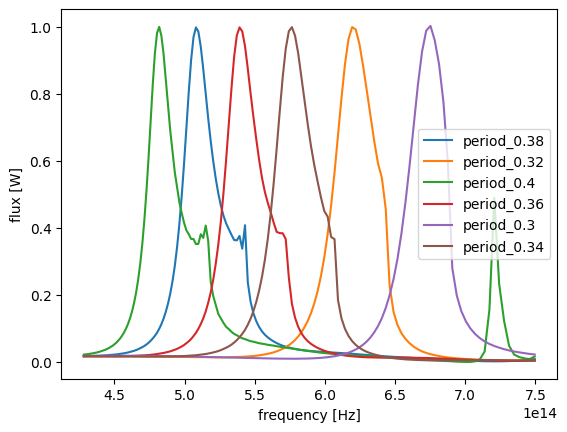

In [1]:
# variables to adapt to your simulation
monitor_name = "ref_spec"
# ------------------------------------

import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web

# Define the simulation list
sim_list = [
    {"task_id": "sw-5f2a3905-a835-46ea-9a5b-b33923925b454", "variables": {"period": 0.38}},
    {"task_id": "sw-a05473ab-f17e-4b03-a6c4-53ae3df47f211", "variables": {"period": 0.32}},
    {"task_id": "sw-9494afda-cb41-4c85-815f-a767d86a20805", "variables": {"period": 0.4}},
    {"task_id": "sw-7126922d-64cd-4366-b6fe-1dde9055b4b63", "variables": {"period": 0.36}},
    {"task_id": "sw-a07f0f54-b5f6-4b4b-804b-f5f8b8b3a6940", "variables": {"period": 0.3}},
    {"task_id": "sw-b0d69553-4621-43cc-9f7c-6a4bd856f7c32", "variables": {"period": 0.34}},
]

ax = None  # Create the ax variable
for id, sim in enumerate(sim_list):
    task_id = sim["task_id"]
    variables = sim["variables"]

    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)

    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"

    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)

    # Call the plot method with the ax variable
    ax = sim_data[monitor_name].flux.plot(ax=ax, label=var_strings[0])[0].axes

ax.legend()

plt.show()

### Customizing the Plot

For a more customizable plot, you can directly create the canvas using [Matplotlib](https://matplotlib.org/), and plot the frequencies (which can be converted to wavelength) on the x-axis and the flux on the y-axis:

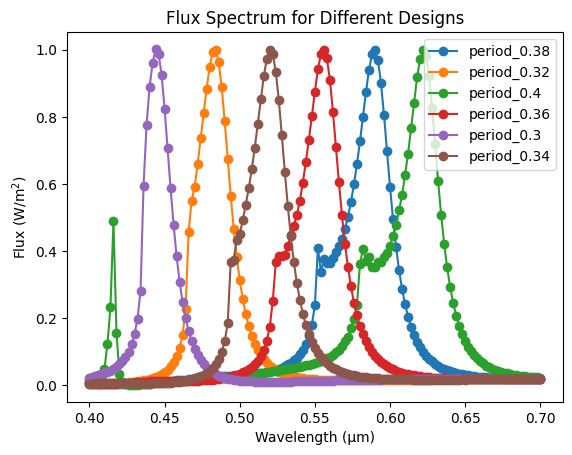

In [2]:
# variables to adapt to your simulation
monitor_name = "ref_spec"
# ------------------------------------

import matplotlib.pyplot as plt
import tidy3d.web as web

# Define the simulation list
sim_list = [
    {"task_id": "sw-5f2a3905-a835-46ea-9a5b-b33923925b454", "variables": {"period": 0.38}},
    {"task_id": "sw-a05473ab-f17e-4b03-a6c4-53ae3df47f211", "variables": {"period": 0.32}},
    {"task_id": "sw-9494afda-cb41-4c85-815f-a767d86a20805", "variables": {"period": 0.4}},
    {"task_id": "sw-7126922d-64cd-4366-b6fe-1dde9055b4b63", "variables": {"period": 0.36}},
    {"task_id": "sw-a07f0f54-b5f6-4b4b-804b-f5f8b8b3a6940", "variables": {"period": 0.3}},
    {"task_id": "sw-b0d69553-4621-43cc-9f7c-6a4bd856f7c32", "variables": {"period": 0.34}},
]

for id, sim in enumerate(sim_list):
    task_id = sim["task_id"]
    variables = sim["variables"]

    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)

    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"

    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)

    # Process the simulation data
    freqs = sim_data[monitor_name].flux.f  # Get the frequencies
    flux = sim_data[monitor_name].flux.values  # Get the flux values

    # Plot the flux spectrum as a function of wavelength
    plt.plot(td.C_0 / freqs, flux, "-o", label=var_strings[0])  # Changing the line style to '-o'


# Add labels and title
plt.xlabel("Wavelength (µm)")
plt.ylabel("Flux (W/m$^2$)")
plt.title("Flux Spectrum for Different Designs")
plt.legend()  # Add a legend to differentiate between designs

plt.show()

## Processing Field Data <a name="3"></a>

Another common use is to process field data from 2D field monitors. To plot the fields, you can simply call the [SimulationData.plot_field](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.components.data.sim_data.AbstractYeeGridSimulationData.html#tidy3d.components.data.sim_data.AbstractYeeGridSimulationData.plot_field) method, specifying the monitor name, field component or field modulus to plot, and the type of data (real part, imaginary part, absolute value, etc.).

In the following example, we will plot the real part of the Ez field component for each monitor, side by side.

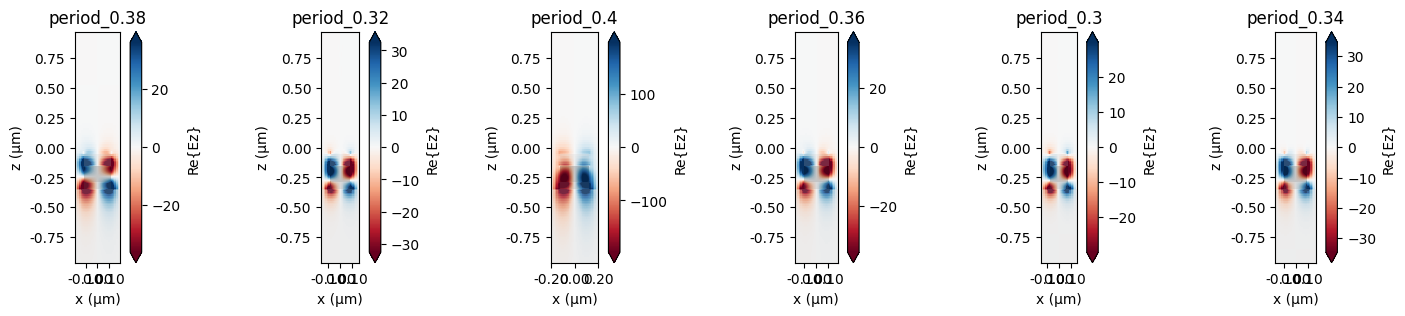

In [3]:
# Variables to adapt to your simulation
monitor_name = "field_R"
field_component = "Ez"
field_type = "real"
frequency = 475861056012720.6
# ------------------------------------

import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web

# Define the simulation list
sim_list = [
    {"task_id": "sw-5f2a3905-a835-46ea-9a5b-b33923925b454", "variables": {"period": 0.38}},
    {"task_id": "sw-a05473ab-f17e-4b03-a6c4-53ae3df47f211", "variables": {"period": 0.32}},
    {"task_id": "sw-9494afda-cb41-4c85-815f-a767d86a20805", "variables": {"period": 0.4}},
    {"task_id": "sw-7126922d-64cd-4366-b6fe-1dde9055b4b63", "variables": {"period": 0.36}},
    {"task_id": "sw-a07f0f54-b5f6-4b4b-804b-f5f8b8b3a6940", "variables": {"period": 0.3}},
    {"task_id": "sw-b0d69553-4621-43cc-9f7c-6a4bd856f7c32", "variables": {"period": 0.34}},
]

fig, Ax = plt.subplots(ncols=6, figsize=(18, 3))  # width=18, height=3 in inches
for id, sim in enumerate(sim_list):
    task_id = sim["task_id"]
    variables = sim["variables"]

    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)

    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"

    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)

    # Plot the fields
    sim_data.plot_field(monitor_name, field_component, field_type, f=frequency, ax=Ax[id])
    Ax[id].set_title(var_strings[0])  # Set the title of each subplot

plt.show()

### Working With Components

To access field components from the field monitor, you just need to call `sim_data[monitor_name].field_component`. With that, you have the freedom to perform any kind of operation with the field components.

In the next example, we will calculate |E|, use the `sel` method to select the desired frequency and coordinate, and plot the `x=0` phase profile of the $E_x$ component.

For this, we will use [NumPy](https://numpy.org/_), a popular Python library for numerical computing, especially with arrays and matrices.

[`np.angle`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html) returns the angle (or phase) of complex numbers, in radians.

[`np.unwrap`](https://numpy.org/doc/stable/reference/generated/numpy.unwrap.html) corrects phase angles to remove jumps greater than $\pi$, making the phase continuous.

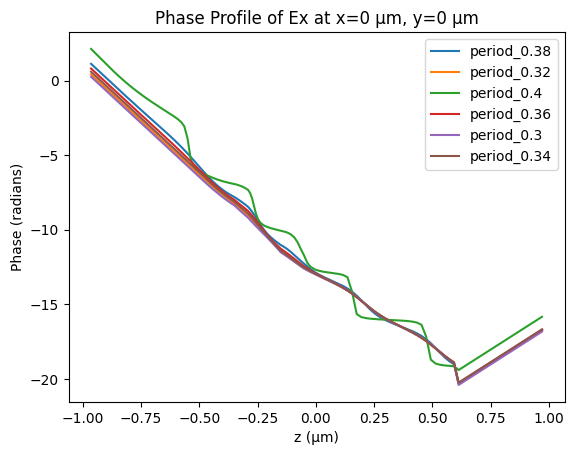

In [4]:
# Variables to adapt to your simulation
monitor_name = "field_R"
field_component = "Ex"
field_type = "real"
frequency = 475861056012720.6
x_coordinate = 0
y_coordinate = 0
# ------------------------------------

import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations
import tidy3d as td
import tidy3d.web as web

# Define the simulation list
sim_list = [
    {"task_id": "sw-5f2a3905-a835-46ea-9a5b-b33923925b454", "variables": {"period": 0.38}},
    {"task_id": "sw-a05473ab-f17e-4b03-a6c4-53ae3df47f211", "variables": {"period": 0.32}},
    {"task_id": "sw-9494afda-cb41-4c85-815f-a767d86a20805", "variables": {"period": 0.4}},
    {"task_id": "sw-7126922d-64cd-4366-b6fe-1dde9055b4b63", "variables": {"period": 0.36}},
    {"task_id": "sw-a07f0f54-b5f6-4b4b-804b-f5f8b8b3a6940", "variables": {"period": 0.3}},
    {"task_id": "sw-b0d69553-4621-43cc-9f7c-6a4bd856f7c32", "variables": {"period": 0.34}},
]

fig, ax = plt.subplots()  # Create a single axis for plotting
for id, sim in enumerate(sim_list):
    task_id = sim["task_id"]
    variables = sim["variables"]

    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)

    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"

    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)

    # Calculate E
    field = sim_data[monitor_name].field_components[field_component]
    selected_field = field.sel(f=frequency, x=x_coordinate, y=y_coordinate)
    angle = np.angle(selected_field.values)  # Calculate the phase angle
    ax.plot(selected_field.z, np.unwrap(angle), label=var_strings[0])  # Plot the phase profile

ax.set_xlabel("z (µm)")
ax.set_ylabel("Phase (radians)")
ax.set_title(f"Phase Profile of {field_component} at x={x_coordinate} µm, y={y_coordinate} µm")
ax.legend()

plt.show()

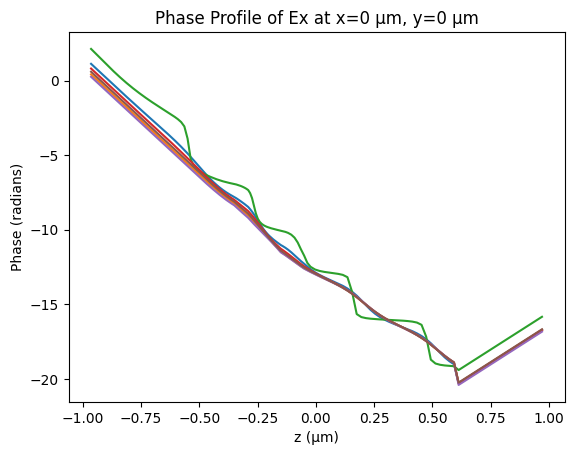

In [5]:
# Variables to adapt to your simulation
monitor_name = "field_R"
field_component = "Ex"
field_type = "real"
frequency = 475861056012720.6
x_coordinate = 0
y_coordinate = 0
# ------------------------------------

import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations
import tidy3d as td
import tidy3d.web as web

design_task_id = [
    "sw-5f2a3905-a835-46ea-9a5b-b33923925b454",
    "sw-a05473ab-f17e-4b03-a6c4-53ae3df47f211",
    "sw-9494afda-cb41-4c85-815f-a767d86a20805",
    "sw-7126922d-64cd-4366-b6fe-1dde9055b4b63",
    "sw-a07f0f54-b5f6-4b4b-804b-f5f8b8b3a6940",
    "sw-b0d69553-4621-43cc-9f7c-6a4bd856f7c32",
]

fig, ax = plt.subplots()  # Create a single axis for plotting
for id, task_id in enumerate(design_task_id):
    # Load and save the design optimization simulations
    sim_data = web.load(task_id, path=f"./sim_{id}.hdf5", verbose=False)

    # Calculate E
    field = sim_data[monitor_name].field_components[field_component]
    selected_field = field.sel(f=frequency, x=x_coordinate, y=y_coordinate)
    angle = np.angle(selected_field.values)  # Calculate the phase angle
    ax.plot(selected_field.z, np.unwrap(angle))

ax.set_xlabel("z (µm)")
ax.set_ylabel("Phase (radians)")
ax.set_title(f"Phase Profile of {field_component} at x={x_coordinate} µm, y={y_coordinate} µm")

plt.show()

Note that the field component can also be accessed as `field = sim_data[monitor_name].Ex`.

## Processing Mode Monitor Data <a name="4"></a>

Now, we demonstrate how to process mode data from a [ModeMonitor](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.ModeMonitor.html). The [ModeMonitor](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.ModeMonitor.html) records a complete mode analysis for each mode, including amplitude, phase, effective index, etc.

In the following example, we will use data from our [Edge Coupler](https://tidy3d.simulation.cloud/workbench?taskId=pa-b6b0c5de-7a23-42fc-a35e-399e0ea3beff) example, where we analyze the modes as a function of the taper length.

Let's iterate through each design and plot the transmittance, which is simply the absolute square of the mode amplitude.

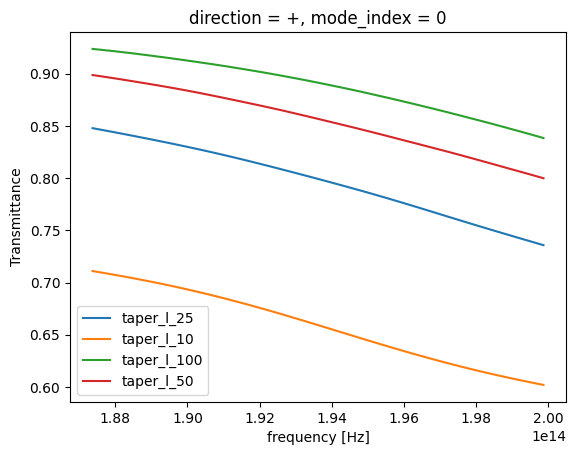

In [6]:
# Variables to adapt to your simulation
monitor_name = "mode_monitor"
mode_index = 0  # Index of the mode to analyze
direction = "+"  # The direction of the mode, can be '+' or '-'
# ------------------------------------

import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web

# Define the simulation list
sim_list = [
    {"task_id": "sw-8738b266-4733-48da-aa13-11b4397872bf1", "variables": {"taper_l": 25}},
    {"task_id": "sw-e490dc15-217f-49b3-a4f5-0675c92d85b80", "variables": {"taper_l": 10}},
    {"task_id": "sw-b91352e9-fb81-4880-9394-3399fa724fc13", "variables": {"taper_l": 100}},
    {"task_id": "sw-f48edeeb-5372-4bfb-acbf-c7f3199d0fc52", "variables": {"taper_l": 50}},
]

ax = None  # Create the ax variable
for id, sim in enumerate(sim_list):
    task_id = sim["task_id"]
    variables = sim["variables"]

    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)

    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"

    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)

    # Plot the |amp|^2
    mode_amplitudes = sim_data[monitor_name].amps.sel(mode_index=mode_index, direction=direction)
    transmittance = mode_amplitudes.abs**2
    ax = transmittance.plot(ax=ax, label=var_strings[0])[0].axes  # Get the axes from the plot

ax.set_ylabel("Transmittance")
ax.legend()

plt.show()

## Process Mode Solver Data <a name="5"></a>

We can also run sweeps using the [ModeSolver](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.plugins.mode.ModeSolver.html).

In this case, it is useful to use the `sim_data[monitor_name].to_dataframe()` method to create a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object containing full mode information, and easily access the real ("n eff") and imaginary ("k eff") parts of the effective index, as well as the mode area and group index if [calculated in the simulation](https://docs.flexcompute.com/projects/tidy3d/en/v2.7.6/faq/docs/faq/how-do-i-plot-the-mode-group-index-versus-wavelength.html).

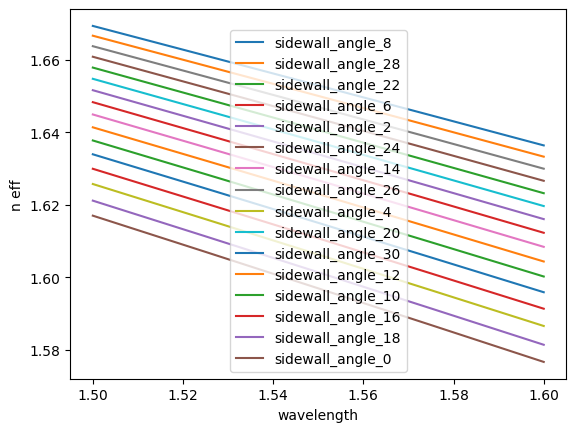

In [7]:
# Variables to adapt to your simulation
mode_index = 0  # Index of the mode to analyze
quantity_of_interest = "n eff"  # Can be 'n eff', 'k eff' or 'mode area'
# ------------------------------------

import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web

# Define the simulation list
sim_list = [
    {"task_id": "sw-db60f8aa-3196-4361-b694-48f6100a4b474", "variables": {"sidewall_angle": 8}},
    {"task_id": "sw-3340fb2a-9627-40f0-a1d0-b5d67128f78914", "variables": {"sidewall_angle": 28}},
    {"task_id": "sw-8e22ae40-3b92-4221-9bf6-25c9104cd8ec11", "variables": {"sidewall_angle": 22}},
    {"task_id": "sw-608fd3e1-ad5c-41ca-a382-247268204ffb3", "variables": {"sidewall_angle": 6}},
    {"task_id": "sw-809cc1e1-0fd5-4f44-8454-fc1aea75df2e1", "variables": {"sidewall_angle": 2}},
    {"task_id": "sw-0fb58701-c820-4090-a309-ebbda46a86ca12", "variables": {"sidewall_angle": 24}},
    {"task_id": "sw-6dc7d32b-7ab6-49c3-8f64-168c9a54c8127", "variables": {"sidewall_angle": 14}},
    {"task_id": "sw-82abae19-4978-47ee-aac8-cb8da40c9e5e13", "variables": {"sidewall_angle": 26}},
    {"task_id": "sw-6d84d662-542c-46b6-91a6-718f84c12de12", "variables": {"sidewall_angle": 4}},
    {"task_id": "sw-5402252e-ccf1-46c1-8a89-789f18cffbe910", "variables": {"sidewall_angle": 20}},
    {"task_id": "sw-dc16e0a9-26c1-4e75-9564-36e6c7bdb05415", "variables": {"sidewall_angle": 30}},
    {"task_id": "sw-3b550f02-3fa4-46d2-9a75-8f0aec1a3a5e6", "variables": {"sidewall_angle": 12}},
    {"task_id": "sw-36823176-e570-4ebc-b339-f20ef0ef4b525", "variables": {"sidewall_angle": 10}},
    {"task_id": "sw-d5bc6181-9e34-4212-a665-87c7be630e718", "variables": {"sidewall_angle": 16}},
    {"task_id": "sw-723945f8-b3c0-4af6-a902-f204895bdc839", "variables": {"sidewall_angle": 18}},
    {"task_id": "sw-0c6e28fa-c2bd-49a7-aca9-cb1946b27f210", "variables": {"sidewall_angle": 0}},
]

ax = None  # Create the ax variable
for id, sim in enumerate(sim_list):
    task_id = sim["task_id"]
    variables = sim["variables"]

    # print(f"Processing simulation {id}: {task_id}")
    # print("Variables: ", variables)

    # Create filename from variables dictionary
    var_strings = [f"{key}_{value}" for key, value in variables.items()]
    filename = f"./sim_{id}_{'_'.join(var_strings)}.hdf5"

    # Load and save the simulation
    sim_data = web.load(task_id, path=filename, verbose=False)

    # Create the DataFrame
    dataframe = sim_data.to_dataframe()
    # Select and plot the quantity of interest
    ax = (
        dataframe.xs(key=mode_index, level="mode_index")
        .set_index("wavelength")[quantity_of_interest]
        .plot(ax=ax, label=var_strings[0])
    )

ax.legend()
ax.set_ylabel(quantity_of_interest)

plt.show()

The code snippet above can be easily adapted to extract and visualize different modal properties by simply modifying the `quantity_of_interest` variable. Available quantities include:

| Description | `quantity_of_interest` value |
|---------------------------------|------------------------------------|
| Effective index (real part) | 'n eff' |
| Effective index (imaginary part) | 'k eff' |
| TE (Ey) polarization fraction | 'TE (Ey) fraction' |
| Waveguide TE fraction | 'wg TE fraction' |
| Waveguide TM fraction | 'wg TM fraction' |
| Mode area | 'mode area' |
| Group index | 'group index' |
| Dispersion (ps/(nm·km)) | 'dispersion (ps/(nm km))' |

Just set `quantity_of_interest` to any of the values above to obtain the corresponding data.